<h1> O método dos mínimos quadrados (MMQ) </h1>


A ideia que está por trás do  MMQ é a de econtrar o melhor ajuste para o conjunto de dados a partir da minimização da soma dos quadrados dos resíduos entre a função de ajuste e os valores observados. A ideia geométrica por trás do método está representada na figura a seguir. 

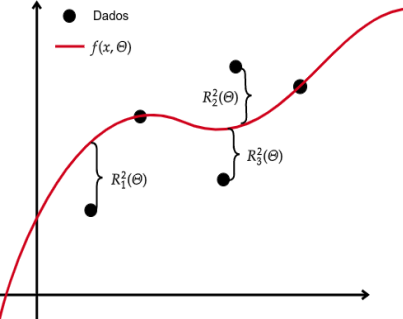

A descrição matemática do resíduo é: 

$
\begin{equation}
    R^2(\Theta) = 	\sum_{i=1}^{n}(y_i - f(x_i, \Theta))^2    
\end{equation}
$

Onde $\Theta$ é um vetor de parâmetros, $\Theta = (\theta_1, \theta_2, \cdots, \theta_n)$. Para minimizar $R^2(\Theta)$, basta deriva em relação a $\Theta$ e igualar a zero: 


$
\begin{equation}
\frac{\partial R^2(\Theta) }{\partial \Theta}  = 2 \sum_{i=1}^{n}(y_i - f(x_i, \Theta))   	\frac{\partial f(x_i, \Theta)}{\partial \Theta} = 0
\end{equation}
$

Note que a quantidade de derivadas obtidas será correspondente à quantidade de parâmentros do modelo, de modo a obter, um sistema linear que nem sempre será viável resolver analiticamente, sendo nesses casos necessário o uso de métodos numéricos iterativos. No deselvolvimento dessa pequena demostração, não foi necessária utilizar tais métodos, usamos funções para operações com matrizes contidas na biblioteca Numpy. 


<h2> Regressão Polinomial  </h2>


Suponha que ao analisar pontos em um gráfico de dispersão, seja verificado que a maneira a qual os pontos estão dispostos não pode ser representada por modelos tradicionais. Nessas ocasiões, parece ser mais adequado a utilização de uma função polinomial de grau $m$. Aplicando o MMQ temos para um polinomio de grau $m$ o seguinte sistema linear. 



$
\begin{equation}
 \begin{bmatrix} 
                    n &  \sum_{i=1}^{n} x_i^1 & \sum_{i=1}^{n} x_i^2 & \cdots &   \sum_{i=1}^{n} x_i^m     \\ 
\sum_{i=1}^{n} x_i^1  &  \sum_{i=1}^{n} x_i^2 & \sum_{i=1}^{n} x_i^3 & \cdots &   \sum_{i=1}^{n} x_i^{m+1} \\ 
\sum_{i=1}^{n} x_i^2  &  \sum_{i=1}^{n} x_i^3 & \sum_{i=1}^{n} x_i^4 & \cdots &   \sum_{i=1}^{n} x_i^{m+2} \\ 
\vdots                &  \vdots               & \vdots               & \ddots &    \vdots                  \\ \sum_{i=1}^{n} x_i^m  & \sum_{i=1}^{n} x_i^{m+1} & \sum_{i=1}^{n} x_i^{m +2} &  \cdots & \sum_{i=1}^{n} x_i^{2m} 
 \end{bmatrix}  
\end{equation}
$
$
\begin{equation}
\begin{bmatrix} 
   \theta_1 \\
   \theta_2 \\
   \theta_3 \\
     \vdots \\
   \theta_m \\ 
 \end{bmatrix} = 
 \end{equation}
$
$
\begin{equation}
\begin{bmatrix} 
   \sum_{i=1}^{n}x_i^0 y_i \\
   \sum_{i=1}^{n}x_i^1 y_i \\
   \sum_{i=1}^{n}x_i^2 y_i \\
     \vdots \\
   \sum_{i=1}^{n}x_i^m y_i \\
 \end{bmatrix} 
 \end{equation}
$


Cuja solução é dada por:



$
 \begin{equation}
   \Theta^T =  X^{-1}Y
 \end{equation}
$

<h2> Coeficiente de Determinação  </h2>

O coeficiente de determinação, é uma medida de ajuste de um modelo aos valores observados. Essa medida  varia 
entra $[0,1]$, podendo ser expressa em termos percentuais. A interpretação para essa medida é do quanto seu
modelo representa os dados aos quais ele foi submetido.O calculo do coeficiente de determinação é dado pela 
seguinte equação:
    
$
\begin{equation}
    r^2 = \frac{\sum_i^{n}(y_i-\overline{y}^2)-\sum_i^{n}(y_i-y_{est}^2)}{\sum_i^{n}(y_i-\overline{y}^2)} 
\end{equation}
$
    


Bibliotecas que serão usadas ao decorrer do código 

In [29]:
from time import sleep 
import matplotlib.pyplot as plt 
from numpy.linalg import inv  
import numpy as np
%matplotlib inline
plt.style.use("ggplot") 

Funções com cada modelo usado

In [3]:
def p1(x,a,b):  
    f1 = a*x + b
    return f1

def p2(x,a,b,c):  
    f1 = a*x**2 + b*x + c
    return f1

def p3(x,a,b,c,d):  
    f1 = a*x**3 + b*x**2 + c*x + d
    return f1

def p4(x,a,b,c,d,e):  
    f1 = a*x**4 + b*x**3 + c*x**2 + d*x + e
    return f1

def info(y, f1):
    r = (sum((y - np.median(y))**2))
    k = (sum((y - f1)**2))
    l = (sum((y - np.median(y))**2))
    coef = (r - k)/l 
    return coef 

Especifica as informações referentes ao dados

In [34]:
arquivo = str(input('Digite o nome do arquivo csv: '))
deli    = str(input('Digite o tipo de demilitador: '))
tol     = float(input('Digite o Coeficiente de Correlação minimo [0,1]: '))

Digite o nome do arquivo csv: dat.csv
Digite o tipo de demilitador: ,
Digite o Coeficiente de Correlação minimo [0,1]: 0.8


Ler os dados e separa em dois vetores 

In [35]:
dados   = np.genfromtxt(arquivo, delimiter = deli)

y = dados[:,1] #armazena os valores de y 
x = dados[:,0] #armazena os valores de x
 
n = 0 #grau do polinomio 

Plota o diagrama de dispersão na tela 

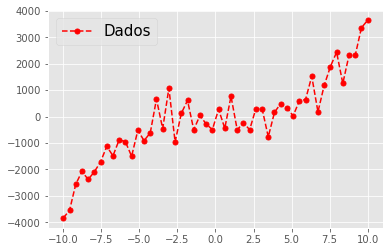

In [32]:
plt.plot(x, y, 'go--', label = 'Dados', color = 'red', ms = 5)  
plt.legend(fontsize=15)
plt.show()

In [36]:
s = np.linspace(min(x), max(x), 100) #Sera usado para plotar o gráfico 

Aplica o Método do Minimos Quadrados 

O modelo que melhor se ajusta a seus dados é  Um polinomio de Grau 3º


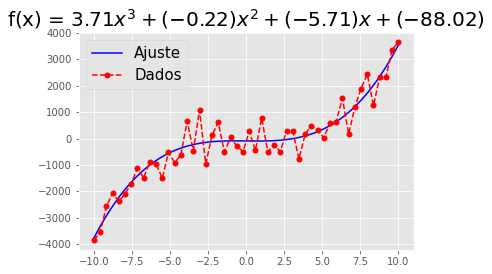

In [37]:

while True:
    n = n + 1  
    
    X = np.zeros((n+1,n+1), dtype = 'float') #inicia uma matriz n + 1 x n + 1 
    Y = np.zeros((n+1,1), dtype = 'float')   #inicia um vetor de tamanho n +1
     
    #preenche a matriz do método dos minimos quadrados 
    for i in range(n+1):
        Y[i]= sum((x**i)*y)
        for j in range(n+1):  
            if i == 0 and j == 0:
                X[i][j] = len(x)
            elif i ==  0 and j != 0:
                X[i][j] = sum(x**j)
            else:
                X[i][j] = sum(x**(j+i))
    
    
    A = np.matrix(X)
    B = np.matrix(Y)
    S = (inv(A)*B) #resolve o sistema para estimar os parametros 
    
    #Modelo = a*x + b 
    if(n == 1):
        
        b, a = S
        a = float(a)
        b = float(b)  
        
        coe = info(y,p1(x,a,b))
      
        if(coe >= tol):
            print('O modelo que melhor se ajusta a seus dados é  ', end = '')
            print('um polinomio de Grau 1º')
            plt.plot(s, p1(s,a,b), lw = 1.5, label = 'Ajuste', color = 'blue')   
            plt.title(r'f(x) = ${:.2f}x + {:.2f}$' if b > 0 else 
                      r'f(x) = ${:.2f}x - {:.2f}$'.format(a,abs(b)),
                      fontsize=20)
            break
    
    #Modelo = a*x^2 + b*x + c 
    if(n == 2): 
            
        c, b, a = S
        a = float(a)
        b = float(b)
        c = float(c) 
        coe = info(y,p2(x,a,b,c))
      
        if(coe >= tol):
            print('O modelo que melhor se ajusta a seus dados é  ', end = '')
            print('Um polinomio de Grau 2º')
            plt.plot(s, p2(s,a,b,c), lw = 1.5, label = 'Ajuste', color = 'blue')   
            plt.title(r'f(x) = ${:.2f}x^2 + ({:.2f})x + ({:.2f})$'.format(a,b,c),
                      fontsize=20)
            break 
     
    #Modelo = a*x^3 + b*x^2 + c*x + d 
    if(n == 3): 
            
        d, c, b, a = S
        a = float(a)
        b = float(b)
        c = float(c)
        d = float(d)
        
        coe = info(y,p3(x,a,b,c,d))
   
        if(coe >= tol):
            print('O modelo que melhor se ajusta a seus dados é  ', end = '')
            print('Um polinomio de Grau 3º')
            plt.plot(s, p3(s,a,b,c,d), lw = 1.5, label = 'Ajuste', color = 'blue')   
            plt.title(r'f(x) = ${:.2f}x^3 + ({:.2f})x^2 + ({:.2f})x + ({:.2f})$'
                      .format(a,b,c,d),fontsize=20)
            break 
    
    #Modelo = a*x^4 + b*x^3 + c*x^2 + d*x + e 
    if(n == 4): 
        
        e ,d, c, b, a = S
        a = float(a)
        b = float(b)
        c = float(c)
        d = float(d)
        e = float(e)
        coe = info(y,p4(x,a,b,c,d,e))
     
        if(coe >= tol):
            print('O modelo que melhor se ajusta a seus dados é  ', end = '')
            print('Um polinomio de Grau 4º')
            plt.plot(s, p4(s,a,b,c,d,e), lw = 1.5, label = 'Ajuste', color = 'blue')   
            plt.title(r'f(x) = ${:.2f}x^4 + ({:.2f})x^3 + ({:.2f})x^2 + ({:.2f})x + ({:.2f})$'
                 .format(a,b,c,d,e),fontsize=15)
            
            break 

    elif (n > 4):
        print('Nenhum modelo desse software conseguiu ajustar  seus dados de maneira satisfatoria.')
        
        break 
        
plt.plot(x, y, 'go--', label = 'Dados', color = 'red', ms = 5)  
plt.legend(fontsize=15)
plt.show()